In [1]:
# Import TensorFlow and hub
import tensorflow as tf
import tensorflow_hub as hub

# Plotting
import matplotlib.pyplot as plt

# some important packages
import os
import re
import numpy as np
import pandas as pd

# scikit-learn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [2]:
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(model_url)
print('Model Loaded')

Model Loaded


In [3]:
def embed(texts):
    return model(texts)

In [4]:
embed(['This movie was great!'])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 0.00549278,  0.02886904, -0.02628895,  0.04502157, -0.01233331,
         0.02568332, -0.00071878, -0.05447305,  0.04221926, -0.01913715,
         0.02710012, -0.04328045, -0.02486853,  0.01359517,  0.00482796,
        -0.05379636,  0.01630707,  0.02139913,  0.02644027, -0.02320251,
         0.06569215, -0.10137626, -0.01691998,  0.02492479,  0.02406816,
        -0.03139618, -0.03265482, -0.05174924, -0.0727149 ,  0.10145196,
         0.03868444,  0.04380692, -0.02071746, -0.01873293, -0.03071439,
         0.01825574,  0.03627157,  0.01321462,  0.0094349 , -0.03006624,
         0.06655684,  0.01529935, -0.10101432, -0.00671949, -0.0157864 ,
         0.04991005,  0.02548565,  0.05454974, -0.0165857 ,  0.05624886,
         0.03834501, -0.08679943, -0.06096424, -0.01161774,  0.01997449,
         0.04206812, -0.04119829, -0.00768586, -0.05101155,  0.01210043,
        -0.01673213, -0.01382073,  0.00373699,  0.04911599, -0.03481684,
 

In [5]:
df = pd.read_csv("movies_cleaned.csv")
df.head()

,id,title,release year,certificate,runtime,genre,rating,summary,directors,actors,lifetime gross in $
0,tt0499549,Avatar,2009,PG-13,162,"Action, Adventure, Fantasy",7.9,A paraplegic Marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2922917914
1,tt4154796,Avengers: Endgame,2019,PG-13,181,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2797501328
2,tt0120338,Titanic,1997,PG-13,194,"Drama, Romance",7.9,A seventeen-year-old aristocrat falls in love ...,James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",2201647264
3,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,PG-13,138,"Action, Adventure, Sci-Fi",7.8,"As a new threat to the galaxy rises, Rey, a de...",J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2069521700
4,tt4154756,Avengers: Infinity War,2018,PG-13,149,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",2048359754


In [6]:
df = df[["title", "genre", "summary", "directors", "actors"]]
df.head()

,title,genre,summary,directors,actors
0,Avatar,"Action, Adventure, Fantasy",A paraplegic Marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,Avengers: Endgame,"Action, Adventure, Drama",After the devastating events of Avengers: Infi...,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."
2,Titanic,"Drama, Romance",A seventeen-year-old aristocrat falls in love ...,James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K..."
3,Star Wars: Episode VII - The Force Awakens,"Action, Adventure, Sci-Fi","As a new threat to the galaxy rises, Rey, a de...",J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna..."
4,Avengers: Infinity War,"Action, Adventure, Sci-Fi",The Avengers and their allies must be willing ...,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Hemsworth, Mark Ruffa..."


In [7]:
summaries = list(df['summary'])

In [8]:
summaries[:5]

['A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.',
 "After the devastating events of Avengers: Infinity War (2018), the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to reverse Thanos' actions and restore balance to the universe.",
 'A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.',
 'As a new threat to the galaxy rises, Rey, a desert scavenger, and Finn, an ex-stormtrooper, must join Han Solo and Chewbacca to search for the one hope of restoring peace.',
 'The Avengers and their allies must be willing to sacrifice all in an attempt to defeat the powerful Thanos before his blitz of devastation and ruin puts an end to the universe.']

In [9]:
embeddings = embed(summaries)
print('The embedding shape is:', embeddings.shape)

The embedding shape is: (1000, 512)


In [10]:
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

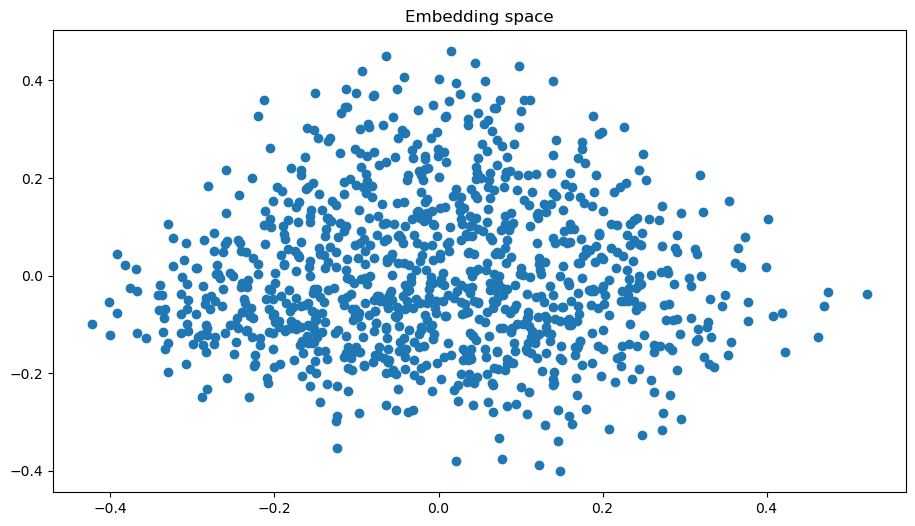

In [11]:
plt.figure(figsize=(11, 6))
plt.title('Embedding space')
plt.scatter(emb_2d[:, 0], emb_2d[:, 1])
plt.show()

In [12]:
nn = NearestNeighbors(n_neighbors=10)
nn.fit(embeddings)

NearestNeighbors(n_neighbors=10)

In [15]:
def recommend(text):
    emb = embed([text])
    neighbors = nn.kneighbors(emb, return_distance=False)[0]
    return df['title'].iloc[neighbors].tolist()

In [20]:
print('Recommended Movies:')
recommend("After the devastating events of Avengers: Infinity War (2018), the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to reverse Thanos' actions and restore balance to the universe.")

Recommended Movies:


['Avengers: Endgame',
 'Avengers: Infinity War',
 'Thor: Ragnarok',
 'Avengers: Age of Ultron',
 'Spider-Man: Far from Home',
 'The Avengers',
 'Captain Marvel',
 'Captain America: Civil War',
 'Thor: The Dark World',
 'Fantastic Four: Rise of the Silver Surfer']